In [1]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [2]:
# Imports numpy as np and matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import seaborn as sns
from __future__ import division
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')

In [4]:
ames = pd.read_csv("../data/ames_train.csv", header=0, na_values="?")

In [5]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
ames.describe()

/Users/Darin/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,NaN,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,NaN,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,NaN,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
ames.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [8]:
neighborhood_groups = ames.groupby("Neighborhood")
neighborhood_groups.describe()

1stFlrSF     2ndFlrSF   3SsnPorch  BedroomAbvGr   BsmtFinSF1   BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  Fireplaces    FullBath   GarageArea  GarageCars  GarageYrBlt    GrLivArea    HalfBath           Id  KitchenAbvGr        LotArea  LotFrontage  LowQualFinSF  MSSubClass   MasVnrArea       MiscVal      MoSold  OpenPorchSF  OverallCond  OverallQual    PoolArea      SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF    YearBuilt  YearRemodAdd       YrSold
Neighborhood                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
Blmngtn      count    17.000000    17.000000   17.000000     17.000000    17.000000    17.000000     17.000000     17.000000    17.000000      17.000000   17.000000   17.000000    17.000000   17.000000    17.000000    17.000000   17.000000    17.000000     17.000000      17.000000    14.000000     17.000000   17.000000    17.000000     17.000000   17.000000    17.000000    17.000000    17.000000   17.000000      17.000000    17.000000     17.000000    17.000000   17.000000    17.000000     17.000000    17.000000
             mean   1427.941176     0.000000    0.000000      1.823529   196.000000     0.000000      0.117647      0.176471  1128.411765       0.000000    0.941176    1.882353   502.764706    2.352941  2005.294118  1427.941176    0.117647   773.941176      1.000000    3398.176471    47.142857      0.000000  114.117647    45.588235      0.000000    5.705882    15.529412     5.000000     7.176471    0.000000  194870.882353     8.470588      6.411765  1324.411765  147.294118  2005.235294   2005.764706  2007.470588
             std     138.178087     0.000000    0.000000      0.392953   418.464455     0.000000      0.332106      0.528594   377.585265       0.000000    0.242536    0.485071   115.028545    0.492592     1.311712   138.178087    0.485071   370.871688      0.000000     371.935014     4.990100      0.000000   24.253563    47.257352      0.000000    2.543735     7.600310     0.000000     0.392953    0.000000   30393.229219    34.925130      0.712287    83.932308   46.350249     1.251470      1.200490     1.462773
             min    1145.000000     0.000000    0.000000      1.000000     0.000000     0.000000      0.000000      0.000000   286.000000       0.000000    0.000000    0.000000   388.000000    2.000000  2003.000000  1145.000000    0.000000   220.000000      1.000000    3010.000000    43.000000      0.000000   20.000000     0.000000      0.000000    2.000000     0.000000     5.000000     7.000000    0.000000  159895.000000     0.000000      5.000000  1145.000000  100.000000  2003.000000   2003.000000  2006.000000
             25%    1269.000000     0.000000    0.000000      2.000000     0.000000     0.000000      0.000000      0.000000  1232.000000       0.000000    1.000000    2.000000   420.000000    2.000000  2005.000000  1269.000000    0.000000   466.000000      1.000000    3182.000000          NaN      0.000000  120.000000    16.000000      0.000000    4.000000    16.000000     5.000000     7.000000    0.000000  174000.000000     0.000000      6.000000  1258.000000  142.000000  2005.000000   2005.000000  2006.000000
             50%    1500.000000     0.000000    0.000000      2.000000    16.000000     0.000000      0.000000      0.000000  1266.000000       0.000000    1.000000    2.000000   438.000000    2.000000  2005.000000  1500.000000    0.000000   791.000000      1.000000    3182.000000          NaN      0.000000  120.000000    18.000000      0.000000    5.000000    20.000000     5.000000     7.00000

In [9]:
neighborhood_groups.describe()[["SalePrice", "LotArea", "YearBuilt"]]

SalePrice        LotArea    YearBuilt
Neighborhood                                                 
Blmngtn      count      17.000000      17.000000    17.000000
             mean   194870.882353    3398.176471  2005.235294
             std     30393.229219     371.935014     1.251470
             min    159895.000000    3010.000000  2003.000000
             25%    174000.000000    3182.000000  2005.000000
             50%    191000.000000    3182.000000  2005.000000
             75%    213490.000000    3684.000000  2006.000000
             max    264561.000000    4045.000000  2007.000000
Blueste      count       2.000000       2.000000     2.000000
             mean   137500.000000    1625.000000  1980.000000
             std     19091.883092     459.619408     0.000000
             min    124000.000000    1300.000000  1980.000000
             25%    130750.000000    1462.500000  1980.000000
             50%    137500.000000    1625.000000  1980.000000
             75%    144250.000000    1787.500000  1980.000000
             max    151000.000000    1950.000000  1980.000000
BrDale       count      16.000000      16.000000    16.000000
             mean   104493.750000    1801.000000  1971.437500
             std     14330.176493     193.895848     1.030776
             min     83000.000000    1680.000000  1970.000000
             25%     91000.000000    1680.000000  1971.000000
             50%    106000.000000    1680.000000  1971.000000
             75%    118000.000000    1897.500000  1972.000000
             max    125000.000000    2368.000000  1973.000000
BrkSide      count      58.000000      58.000000    58.000000
             mean   124834.051724    7360.413793  1931.431034
             std     40348.689270    2714.360899    11.941542
             min     39300.000000    4130.000000  1908.000000
             25%    100500.000000    6000.000000  1923.000000
             50%    124300.000000    6240.000000  1929.500000
             75%    141175.000000    8337.750000  1939.000000
             max    223500.000000   21384.000000  1970.000000
ClearCr      count      28.000000      28.000000    28.000000
             mean   212565.428571   30875.750000  1966.571429
             std     50231.538993   34777.377591    19.305399
             min    130000.000000    2887.000000  1908.000000
             25%    183750.000000   11114.500000  1956.500000
             50%    200250.000000   17575.000000  1966.500000
             75%    242225.000000   37151.000000  1977.500000
             max    328000.000000  159000.000000  1997.000000
CollgCr      count     150.000000     150.000000   150.000000
             mean   197965.773333    9619.146667  1997.886667
             std     51403.666438    2344.775545    10.436472
             min    110000.000000    4426.000000  1969.000000
             25%    152958.750000    8467.500000  1997.000000
             50%    197200.000000    9356.000000  2002.000000
             75%    225725.000000   10889.750000  2004.000000
             max    424870.000000   16285.000000  2009.000000
Crawfor      count      51.000000      51.000000    51.000000
             mean   210624.725490   11809.686275  1941.549020
             std     68866.395472    5315.343377    23.425041
             min     90350.000000    3842.000000  1910.000000
             25%    159250.000000    7573.000000  1924.500000
             50%    200624.000000   11500.000000  1938.000000
             75%    239000.000000   14278.500000  1953.000000
             max    392500.000000   32668.000000  2008.000000
Edwards      count     100.000000     100.000000   100.000000
             mean   128219.700000   10218.650000  1955.970000
             std     43208.616459    7026.897096    28.865573
             min     58500.000000    2522.000000  1900.000000
             25%    101500.000000    8107.500000  1940.000000
             50%    121750.000000    9091.000000  1954.000000
             75%    145225.000000   10890.250000  1972.7

In [10]:
neighborhood_groups.SalePrice.agg(["min", "max", "mean"]).sort_values(by="mean")

,min,max,mean
Neighborhood,,,
MeadowV,75000,151400,98576
IDOTRR,34900,169500,100123
BrDale,83000,125000,104493
BrkSide,39300,223500,124834
Edwards,58500,320000,128219
OldTown,37900,475000,128225
Sawyer,62383,190000,136793
Blueste,124000,151000,137500
SWISU,60000,200000,142591


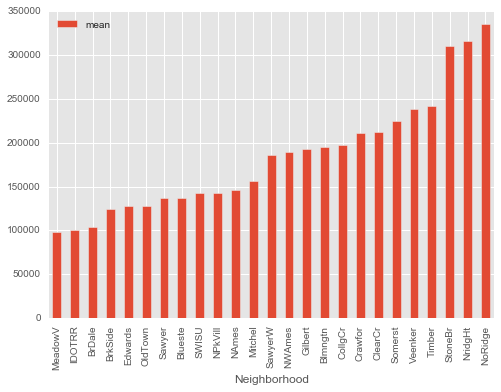

In [11]:
neighborhood_groups.SalePrice.agg(["mean"]).sort_values(by="mean").plot(kind="bar")

In [12]:
neighborhood_groups[["SalePrice", "LotArea", "YearBuilt"]].mean()

,SalePrice,LotArea,YearBuilt
Neighborhood,,,
Blmngtn,194870.882353,3398.176471,2005.235294
Blueste,137500.000000,1625.000000,1980.000000
BrDale,104493.750000,1801.000000,1971.437500
BrkSide,124834.051724,7360.413793,1931.431034
ClearCr,212565.428571,30875.750000,1966.571429
CollgCr,197965.773333,9619.146667,1997.886667
Crawfor,210624.725490,11809.686275,1941.549020
Edwards,128219.700000,10218.650000,1955.970000
Gilbert,192854.506329,11379.151899,1998.253165


In [13]:
neighborhood_and_bedroomabvgr = ames.groupby(["Neighborhood", "BedroomAbvGr"])
neighborhood_and_bedroomabvgr.describe()[["SalePrice"]] # Limits the describe to just SalePrice

SalePrice
Neighborhood BedroomAbvGr                     
Blmngtn      1            count       3.000000
                          mean   207153.666667
                          std     49781.562253
                          min    175900.000000
                          25%    178450.000000
                          50%    181000.000000
                          75%    222780.500000
                          max    264561.000000
             2            count      14.000000
                          mean   192238.857143
                          std     26709.232157
                          min    159895.000000
                          25%    172875.000000
                          50%    191500.000000
                          75%    208667.750000
                          max    246578.000000
Blueste      2            count       1.000000
                          mean   124000.000000
                          std              NaN
                          min    124000.000000
                          25%    124000.000000
                          50%    124000.000000
                          75%    124000.000000
                          max    124000.000000
             3            count       1.000000
                          mean   151000.000000
                          std              NaN
                          min    151000.000000
                          25%    151000.000000
                          50%    151000.000000
                          75%    151000.000000
                          max    151000.000000
BrDale       2            count       8.000000
                          mean    99862.500000
                          std     14681.177210
                          min     83000.000000
                          25%     88475.000000
                          50%     97250.000000
                          75%    109000.000000
                          max    122500.000000
             3            count       8.000000
                          mean   109125.000000
                          std     13246.967308
                          min     88000.000000
                          25%    102375.000000
                          50%    112500.000000
                          75%    118375.000000
                          max    125000.000000
BrkSide      1            count       4.000000
                          mean    61925.000000
                          std     17145.723471
                          min     39300.000000
                          25%     54825.000000
                          50%     64250.000000
                          75%     71350.000000
                          max     79900.000000
             2            count      21.000000
                          mean   103304.761905
                          std     22165.750071
                          min     52000.000000
                          25%     85500.000000
                          50%    105000.000000
                          75%    119000.000000
                          max    134900.000000
             3            count      28.000000
                          mean   140991.964286
                          std     33721.895743
                          min     76500.000000
                          25%    121200.000000
                          50%    132000.000000
                          75%    154931.250000
                          max    223500.000000
             4            count       4.000000
                          mean   165250.000000
                          std     36227.291738
                          min    132500.000000
                          25%    136250.000000
                          50%    160750.000000
                          75%    189750.000000
                          max    207000.000000
             5            count       1.000000
                          mean   214500.000000
                          std              NaN
                          min    214500.00

In [14]:
# I believe this code pivots the data to see for each year (index/rows), what was the median (default aggfunc argument) SalePrice (value) of homes sold in each neighborhood (columns)
pivoted_years = ames.pivot_table(values='SalePrice',
                 columns='Neighborhood',
                 index='YearBuilt')
pivoted_years

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
YearBuilt,,,,,,,,,,,,,,,,,,,,,,,,,
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94000.0,NaN,NaN,NaN,NaN,NaN
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200619.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


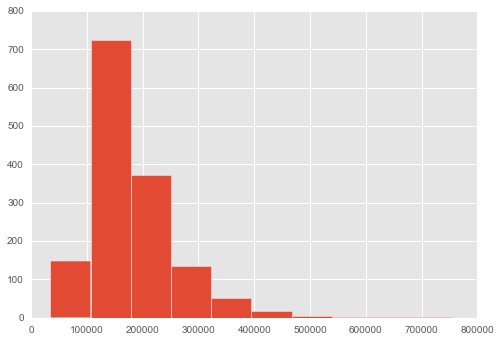

In [15]:
ames.SalePrice.hist()

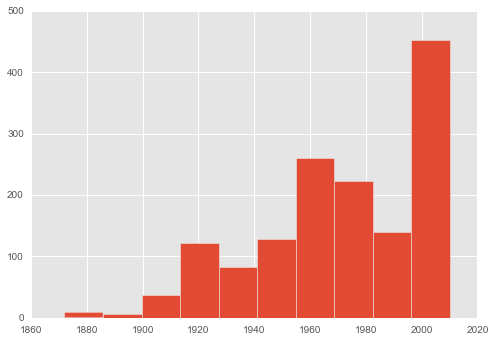

In [16]:
ames.YearBuilt.hist()

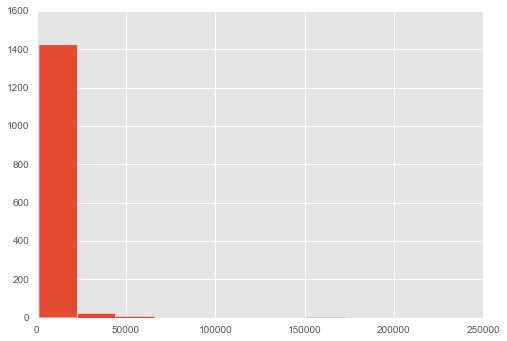

In [17]:
ames.LotArea.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116c56a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a78c8d0>]], dtype=object)

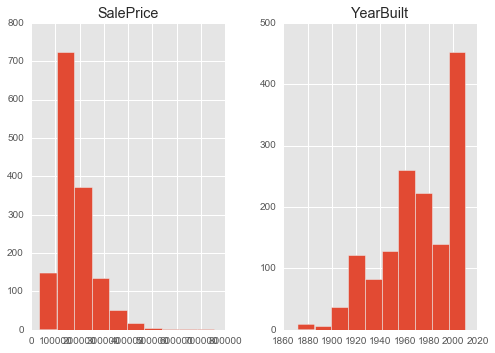

In [18]:
ames[["SalePrice", "YearBuilt"]].hist()

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ames_numerics = ames.select_dtypes(include=numerics)

In [20]:
def gen_hist(dataframe, cols):
    for i in range(len(cols)):
        dataframe[[cols[i]]].hist()
        
# gen_hist(ames_numerics, ames_numerics.columns)

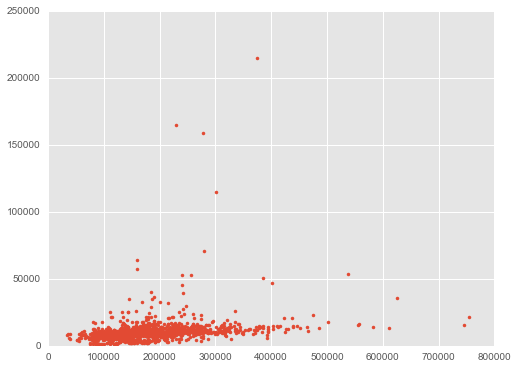

In [21]:
# Scatter plot of SalePrice vs LotArea

plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(ames.SalePrice, ames.LotArea, '.')

# Looks like there are some outliers of large LotArea properties being sold for less than you might expect.
# Maybe something was wrong with the properties, or maybe it was family members transferring property to one another for cheap?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aab03d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc134d0>]], dtype=object)

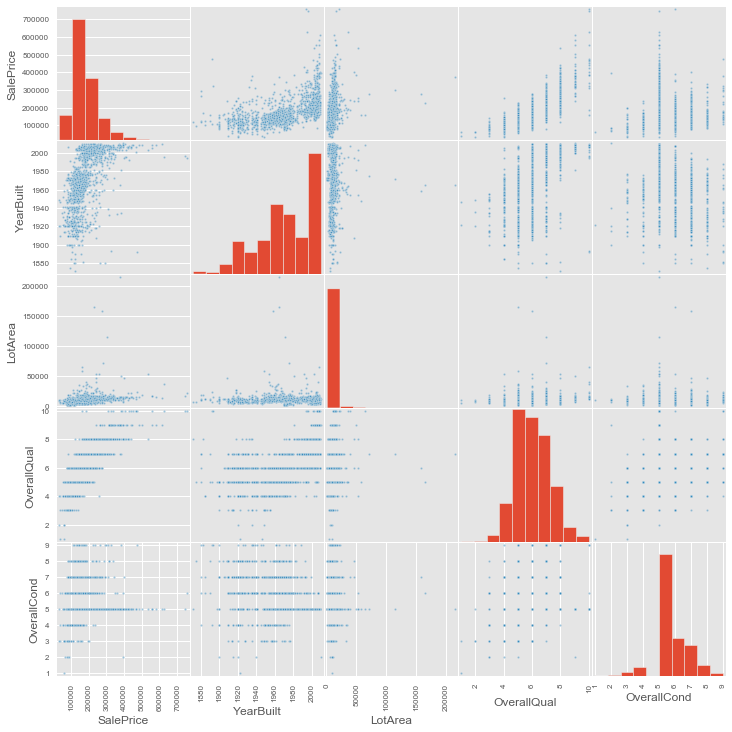

In [22]:
cols = ['SalePrice', 'YearBuilt', 'LotArea', 'OverallQual', 'OverallCond',]
pd.scatter_matrix(ames[cols], figsize=(12, 12))

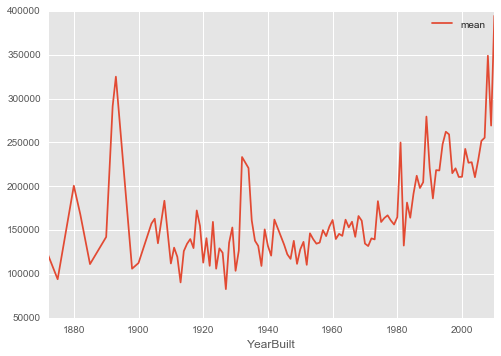

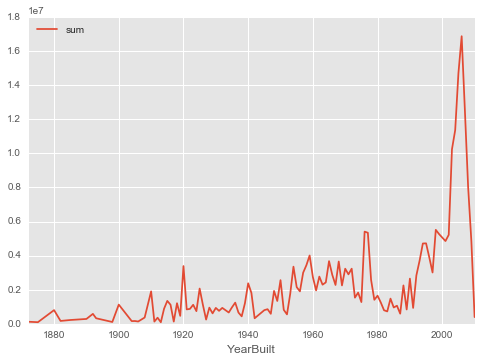

In [23]:
yearbuilt_grouped = ames.groupby("YearBuilt")

plt.figure()
yearbuilt_grouped.SalePrice.agg(['mean']).plot()

plt.figure()
yearbuilt_grouped.SalePrice.agg(['sum']).plot()

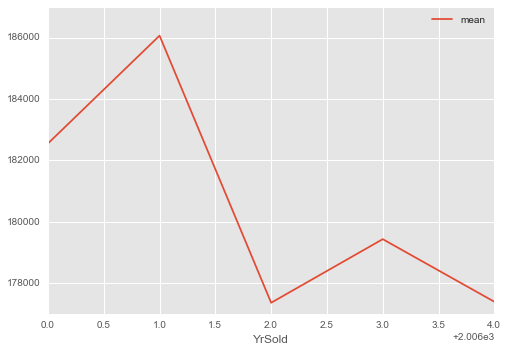

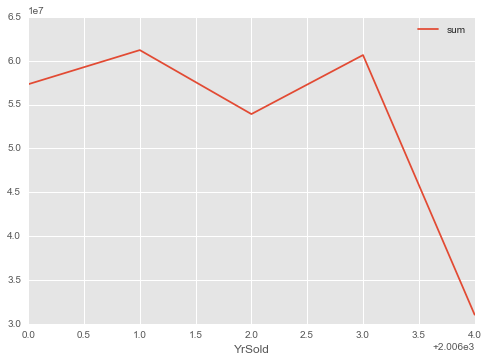

In [24]:
yearsold_grouped = ames.groupby("YrSold")

plt.figure()
yearsold_grouped.SalePrice.agg(['mean']).plot()

plt.figure()
yearsold_grouped.SalePrice.agg(['sum']).plot()